In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import date
import sys
from numpy import pi,exp,sqrt
import uproot
sys.path.append('/sbnd/app/users/brindenc/mypython')
from bc_utils.refutils import pic,plotters
from time import time
import matplotlib
from sklearn.linear_model import LinearRegression
import seaborn as sn
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import glob
from PIL import Image
from datetime import date
import subprocess
import os
from natsort import natsorted, ns

In [2]:
%load_ext autoreload
%autoreload 2

plotters.plot_stuff()
plt.style.use(['science','no-latex']) #Turn this off if you don't have science style plots
#cwd = '/sbnd/app/users/brindenc/analyze_sbnd/PMT/v09_43_00/reflections/';os.chdir(cwd)
day = date.today().strftime("%d_%m_%Y")
cwd = os.getcwd()+'/'

In [3]:
pmts = pd.read_pickle(cwd+'PMT_info.pkl')
pmts = pmts.drop(['opdet_area','f','distance'],axis=1)
pmts.head()

,ophit_opdet,ophit_opdet_x,ophit_opdet_y,ophit_opdet_z,ophit_opdet_type,opdet_tpc
ophit_opch,,,,,,
6,6,-213.4,-175.0,27.874225,0,0
7,7,213.4,-175.0,27.874225,0,1
8,8,-213.4,-95.0,27.874225,0,0
9,9,213.4,-95.0,27.874225,0,1
10,10,-213.4,-40.0,27.874225,0,0


In [4]:
ch=168
x = pmts.loc[ch,'ophit_opdet_x']
y = pmts.loc[ch,'ophit_opdet_y']
z = pmts.loc[ch,'ophit_opdet_z']
ch = pmts.loc[ch,'ophit_opdet']
singref = pic.single_plane_reflection(x,y,z,flip_coord='xyz',x_refs=1,y_refs=1,z_refs=1,initialize=True,ch=ch)
singref = pic.get_ref_coefs(singref)
plane_grid = plotters.make_plane_meshes(x,xiter=213.4,n_ref=1)
ckeys = ['tot_ref','cpa_ref','x_ref','y_ref','z_ref','Reflectivity']

for ckey in ckeys:
  plotters.plot_ref('ophit_opdet_x','ophit_opdet_y','ophit_opdet_z',ckey,plane_grid,n_ref=1,x=None,y=None,z=None,
  coord_ref_df=singref,elev=20,azim=40,axis='on',title=f'PMT {ch} Colorscale: {ckey}')
  plotters.save_plot(f'PMT{ch}ckey__{ckey}')
  plt.close()

In [14]:
singref.head()

,ophit_opdet_x,ophit_opdet_y,ophit_opdet_z,tot_ref,cpa_ref,apa_ref,ophit_opdet,x_ref,y_ref,z_ref,Reflectivity
0,-213.4,40.0,288.241925,0,0,0,168,0,0,0,1.0
1,-213.4,40.0,-288.241925,1,0,0,1168,0,0,1,0.0
2,-213.4,40.0,711.758075,1,0,0,2168,0,0,1,0.0
3,-213.4,-440.0,288.241925,1,0,0,3168,0,1,0,0.0
4,-213.4,-440.0,-288.241925,2,0,0,4168,0,1,1,0.0


In [8]:
new_pmts = pic.get_ref_PMTs(pmts)
new_pmts.head()


,ophit_opdet_x,ophit_opdet_y,ophit_opdet_z,ophit_opdet_type,opdet_tpc,tot_ref,cpa_ref,apa_ref,ophit_opdet,x_ref,y_ref,z_ref,Reflectivity
0,-213.4,-175.0,27.874225,0,0,0,0,0,6,0,0,0,1.0
1,-213.4,-175.0,-27.874225,0,0,1,0,0,1006,0,0,1,0.0
2,-213.4,-175.0,972.125775,0,0,1,0,0,2006,0,0,1,0.0
3,-213.4,-225.0,27.874225,0,0,1,0,0,3006,0,1,0,0.0
4,-213.4,-225.0,-27.874225,0,0,2,0,0,4006,0,1,1,0.0


<Axes3D:>

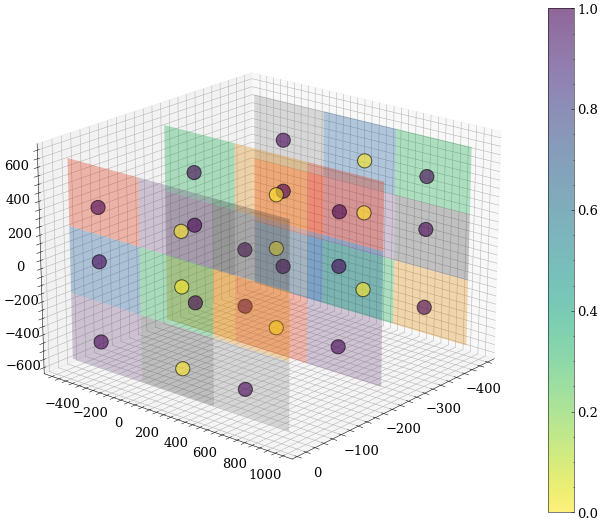

For funsies

In [7]:
#Constants
n_ref = 3
n_images = 11

In [8]:
os.chdir(cwd)
params = [250,200,0,20,20,n_ref] #initialize params x,y,z,elev,azim,n_ref
plotters.make_images(params,n_images=n_images,azimiter=0.01,eleviter=0.01)
os.getcwd()

'/sbnd/app/users/brindenc/analyze_sbnd/PMT/v09_43_00/reflections'

In [9]:
plotters.make_ref_gif(f'{cwd}Plots/Plots_{day}/',n_images)
os.chdir(cwd)

/sbnd/app/users/brindenc/analyze_sbnd/PMT/v09_43_00/reflections/Plots/Plots_18_03_2022


In [28]:
coord_ref_df = pic.single_plane_reflection(200,0,250,x_refs=n_ref,y_refs=n_ref,z_refs=n_ref,initialize=True)
grids = plotters.make_plane_meshes(200,n_ref=n_ref)

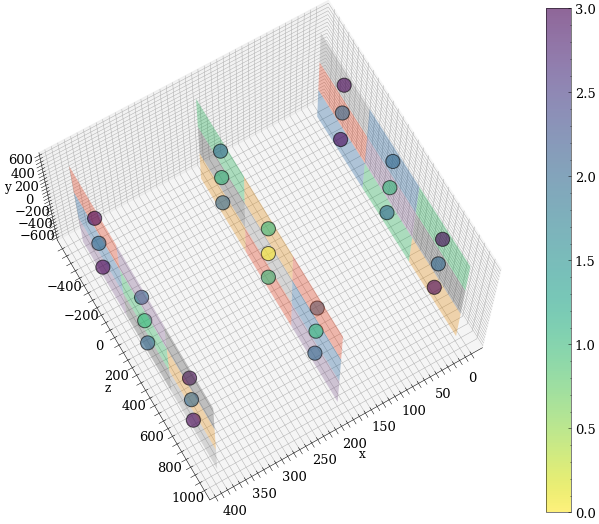

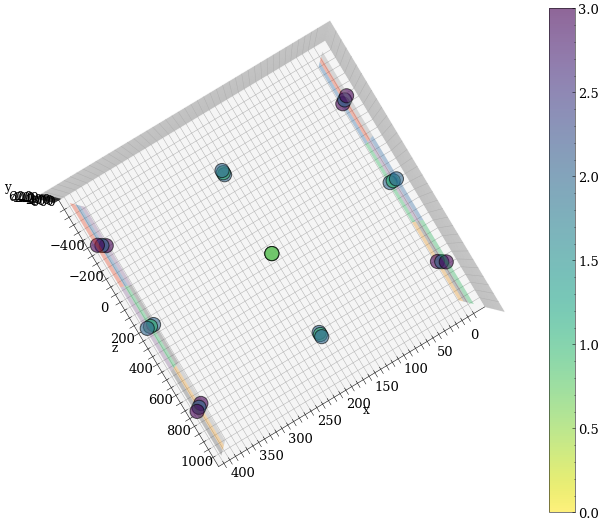

In [36]:
ax = plotters.plot_ref('x','y','z','tot_ref',grids,n_ref=n_ref,coord_ref_df=coord_ref_df,axis='on',azim=60,elev=70)
ax = plotters.plot_ref('x','y','z','tot_ref',grids,n_ref=n_ref,coord_ref_df=coord_ref_df,axis='on',azim=60,elev=90)

In [20]:
grids = plotters.make_plane_meshes(200)

In [293]:
x.shape

(27,)

In [130]:
#Single reflection test
y_bot= reflect_xz(200) #reflect across bottom
y_top = reflect_xz(200,flip=3) #reflect across top 
y_top,y_bot

(200, -600)

In [131]:
#Multiple reflection test
y_bot3 = reflect_xz(0,ref=3) #reflect off bottom, then top, then bottom, for y = 0, we expect -1200
y_bot3

-1200

In [132]:
def reflect_yz(x,flip=2,ref=1):
  #Returns new y, reflected across face in xz plane in detector
  #flip divisible by 2 is off cpa, otherwise off apa (where PDS is)
  #ref is number of reflections
  L = 200 #Length of x-coordinate
  x_prime=0

  if flip % 2 == 0:
    x_prime = -x*ref #Since x is always the same
  else: 
    x_prime = x*ref #Since x is always the same
  return x_prime
  

In [93]:
#Reflect off bottom, then top
y_bot = reflect_xz(0)
y_bot2 = reflect_xz(y_bot,flip=2,ref=2) #Expect -800 for 2 reflections from 0
y_bot,y_bot2

1
-2


(-400, 1200)

(599, -201)